# ANALISÍS EXPLORATORIO DE DATOS RESULTADOS ICFES

>



## Contexto

Es bien sabido que la educación en las zonas rurales del país es un tema en donde flaqueamos. Dicho esto, la pandemia afectó de cierto modo la manera de evaluar las instituciones mediante las pruebas saber 11.

Dicho esto, se busca analizar y comprobar con datos lo que suele ser repetido constantemente por la población colombiana "Los colegios privados son mejores","La zona urbana tiene mejores resultados". Tomando una región de colombia que cuenta con una extensa area rural, el caribe.



##Descripción del dataset

El dataset cuenta mayoritariamente con variables categoricas, pero se centra principalmente en el resultado de las instituciones del caribe colombiano con respecto a las Pruebas Saber 11 para los años 2020, 2021 y 2022.

## Diccionario de datos




*   Dane establecimiento: Código numerico mediante el cual se suele identificar la institución
*   Departamento: Nombre del departamento del caribe colombiano (Atlantico, Bolivar, Cesar, Cordoba, La Guajira, Madgalena, San andrés y Sucre)
*   Municipio: Nombre del municipio
*   Establecimientos Educativos: Nombre de la institucion
*   Promedio del puntaje Global 2020: Resultado en promedio de los resultados globales de las pruebas Saber 11
*   Promedio del puntaje Global 2021: Resultado en promedio de los resultados globales de las pruebas Saber 11
*   Promedio del puntaje Global 2022: Resultado en promedio de los resultados globales de las pruebas Saber 11
*   Zona: Area correspondiente a la institucion, determina si pertenece al area Urbana o Rural
*   Sector: Sector correspondiente a la institucion, determina si pertenece al Sector Oficial(Colegio Público) o No Oficial (Colegio Privado)







## Objetivo

Evaluar si hay diferencias signficativas entre los resultados obtenidos por las instituciones rurales oficiales en comparación a las otras alternativas.

### 1. Pregunta Smart

¿Qué porcentaje de las instituciones educativas rurales oficiales de la región Caribe pertenecen al top 20 departamental de las instituciones con un mejor resultado promedio en las Pruebas Saber 11 en los años 2020 a 2022?

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math

In [ ]:
#Importamos la libreria de drive

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## 2. Obtener Datos


In [ ]:

# Rutas de los archivos CSV
filepath1 = r'/gdrive/MyDrive/Colab Notebooks/Región_Caribe_2020.csv'
filepath2 = r'/gdrive/MyDrive/Colab Notebooks/Región_Caribe_2021.csv'
filepath3 = r'/gdrive/MyDrive/Colab Notebooks/Región_Caribe_2022.csv'

# Cargar los archivos CSV en DataFrames separados
df_2020 = pd.read_csv(filepath1, sep=';')
df_2021 = pd.read_csv(filepath2, sep=';')
df_2022 = pd.read_csv(filepath3, sep=';')

## 3. Analizar estructura de los datos

In [ ]:
# Ver estructura de los DataFrames SEPARADOS
print(df_2020.shape)
print(df_2021.shape)
print(df_2022.shape)

print(df_2020.info())
print(df_2021.info())
print(df_2022.info())

print(df_2020.columns)
print(df_2021.columns)
print(df_2022.columns)


(2343, 7)
(2372, 7)
(2411, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   DANE Establecimiento              2343 non-null   object
 1   Departamento                      2343 non-null   object
 2   Municipio                         2343 non-null   object
 3   Establecimientos Educativos       2343 non-null   object
 4   Promedio del puntaje global 2020  2343 non-null   int64 
 5   Zona                              2343 non-null   object
 6   Sector                            2343 non-null   object
dtypes: int64(1), object(6)
memory usage: 128.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   DANE Estableci

In [ ]:
# Determinar las columnas en común
common_cols = set(df_2020.columns).intersection(df_2021.columns, df_2022.columns)
print(common_cols)

{'DANE Establecimiento', 'Sector', 'Establecimientos Educativos', 'Municipio', 'Departamento', 'Zona'}


In [ ]:
# Hacer DOS merge, para crear el dfdefinitivo
df_merge = pd.merge(df_2020,df_2021, on='Establecimientos Educativos')
dfdefinitivo = pd.merge(df_merge, df_2022, on='Establecimientos Educativos')
dfdefinitivo.head()

,DANE Establecimiento_x,Departamento_x,Municipio_x,Establecimientos Educativos,Promedio del puntaje global 2020,Zona_x,Sector_x,DANE Establecimiento_y,Departamento_y,Municipio_y,Promedio del puntaje global 2021,Zona_y,Sector_y,DANE Establecimiento,Departamento,Municipio,Promedio del puntaje global 2022,Zona,Sector
0,"3,080011E+11",ATLANTICO,BARRANQUILLA,CENTRO EDUCATIVO BOSTON INTERNACIONAL,363,URBANO,NO OFICIAL,"3,08001E+11",ATLANTICO,BARRANQUILLA,374,URBANO,NO OFICIAL,"3,08001E+11",ATLANTICO,BARRANQUILLA,382,URBANO,NO OFICIAL
1,"3,080010E+11",ATLANTICO,BARRANQUILLA,NUEVO COLEGIO DEL PRADO,361,URBANO,NO OFICIAL,"3,08001E+11",ATLANTICO,BARRANQUILLA,361,URBANO,NO OFICIAL,"3,08001E+11",ATLANTICO,BARRANQUILLA,361,URBANO,NO OFICIAL
2,"1,080010E+11",ATLANTICO,BARRANQUILLA,INSTITUCION EDUCATIVA DISTRITAL ALEXANDER VON ...,359,URBANO,OFICIAL,"1,08001E+11",ATLANTICO,BARRANQUILLA,355,URBANO,OFICIAL,"1,08001E+11",ATLANTICO,BARRANQUILLA,359,URBANO,OFICIAL
3,"3,130010E+11",BOLIVAR,CARTAGENA DE INDIAS,CENTRO DE EDUCACION EL RECREO,358,URBANO,NO OFICIAL,"3,13001E+11",BOLIVAR,CARTAGENA DE INDIAS,350,URBANO,NO OFICIAL,"3,13001E+11",BOLIVAR,CARTAGENA DE INDIAS,356,URBANO,NO OFICIAL
4,"3,138360E+11",BOLIVAR,TURBACO,CORPORACION EDUCATIVA LA CONCEPCION,354,URBANO,NO OFICIAL,"3,13836E+11",BOLIVAR,TURBACO,356,URBANO,NO OFICIAL,"3,13836E+11",BOLIVAR,TURBACO,364,URBANO,NO OFICIAL


In [ ]:
#Ahora revisamos la estructura del nuevo dataframe

print(dfdefinitivo.shape)
print(dfdefinitivo.info())
print(dfdefinitivo.columns)
print(dfdefinitivo.isna().sum())

(2864, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   DANE Establecimiento_x            2864 non-null   object
 1   Departamento_x                    2864 non-null   object
 2   Municipio_x                       2864 non-null   object
 3   Establecimientos Educativos       2864 non-null   object
 4   Promedio del puntaje global 2020  2864 non-null   int64 
 5   Zona_x                            2864 non-null   object
 6   Sector_x                          2864 non-null   object
 7   DANE Establecimiento_y            2864 non-null   object
 8   Departamento_y                    2864 non-null   object
 9   Municipio_y                       2864 non-null   object
 10  Promedio del puntaje global 2021  2864 non-null   int64 
 11  Zona_y                            2864 non-null   object
 12  Sector_y 

## 4. Dividir entre categoricas y numericas


*   
Categoricas: ZONA, SECTOR, DEPARTAMENTO , MUNICIPIO , ESTABLECIMIENTO EDUCATIVO
*  
Numericas: Promedio del puntaje global 2020, Promedio del puntaje global 2021, Promedio del puntaje global 2022


## 5. Analisis  Categoricas

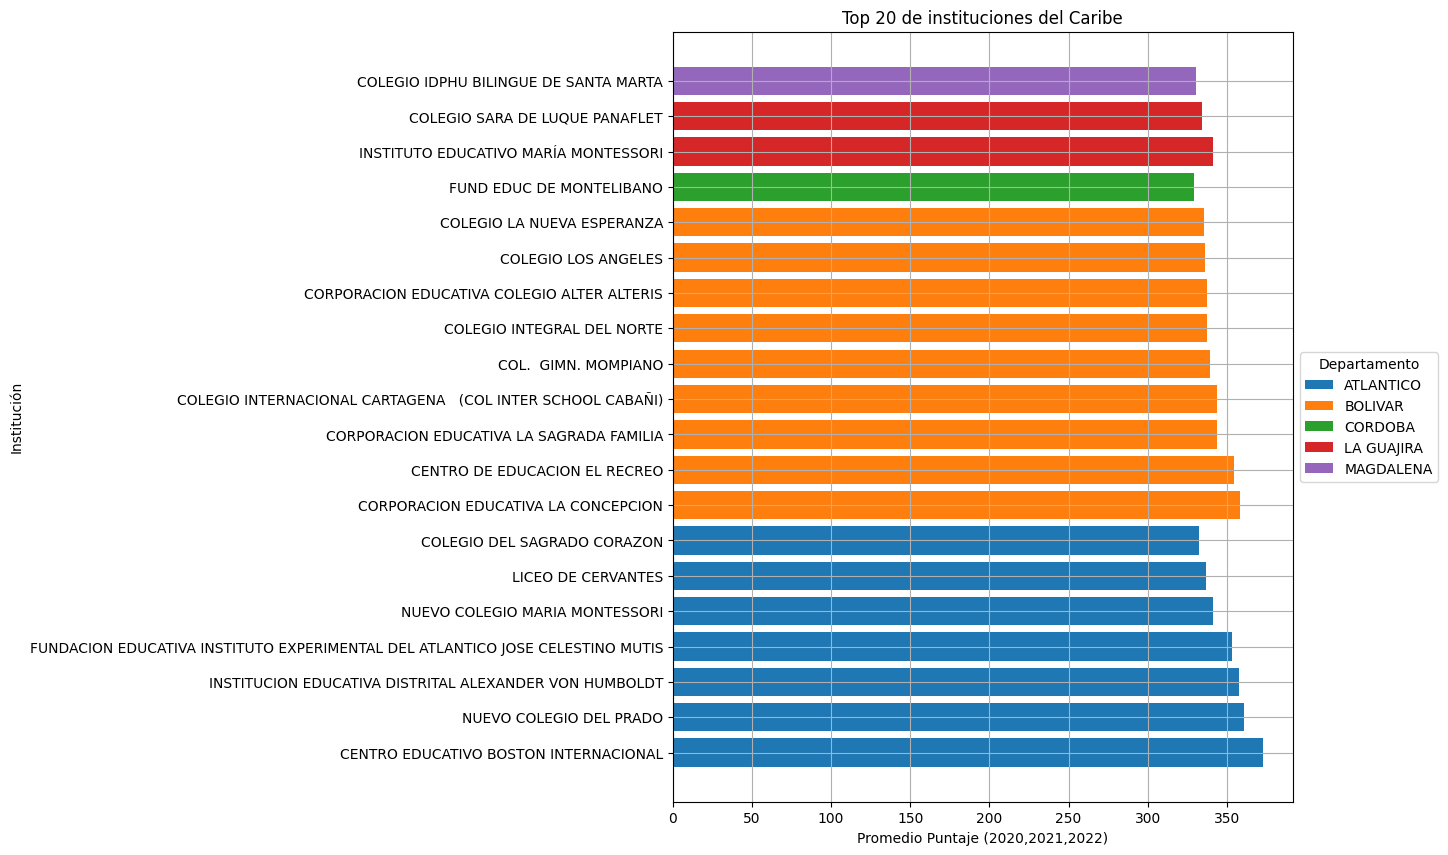

In [ ]:


# Agrupar los datos por institución y departamento, y calcular el promedio del puntaje global para cada uno sobre los tres años
df_promedio_institucion = dfdefinitivo.groupby(['Establecimientos Educativos', 'Departamento'])[['Promedio del puntaje global 2020', 'Promedio del puntaje global 2021', 'Promedio del puntaje global 2022']].mean()

# Eliminar las instituciones que tienen algún valor faltante
#df_promedio_institucion = df_promedio_institucion.dropna()
#En este caso, como vimos anteriormente, NO HAY valores faltantes

# Calcular el promedio de los tres años y ordenar por ese promedio
df_promedio_institucion['Promedio_total'] = df_promedio_institucion.mean(axis=1)
df_promedio_institucion_top20G = df_promedio_institucion.sort_values(by='Promedio_total', ascending=False).head(20)

# Resetear el índice para tener acceso a las columnas Departamento e Institución
df_promedio_institucion_top20G = df_promedio_institucion_top20G.reset_index()

# Trazar la gráfica de barras para las instituciones del top 20
plt.figure(figsize=(8, 10))
for departamento, data in df_promedio_institucion_top20G.groupby('Departamento'):
    plt.barh(data['Establecimientos Educativos'], data['Promedio_total'], label=departamento)

plt.title('Top 20 de instituciones del Caribe')
plt.xlabel('Promedio Puntaje (2020,2021,2022)')
plt.ylabel('Institución')
plt.legend(title='Departamento', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

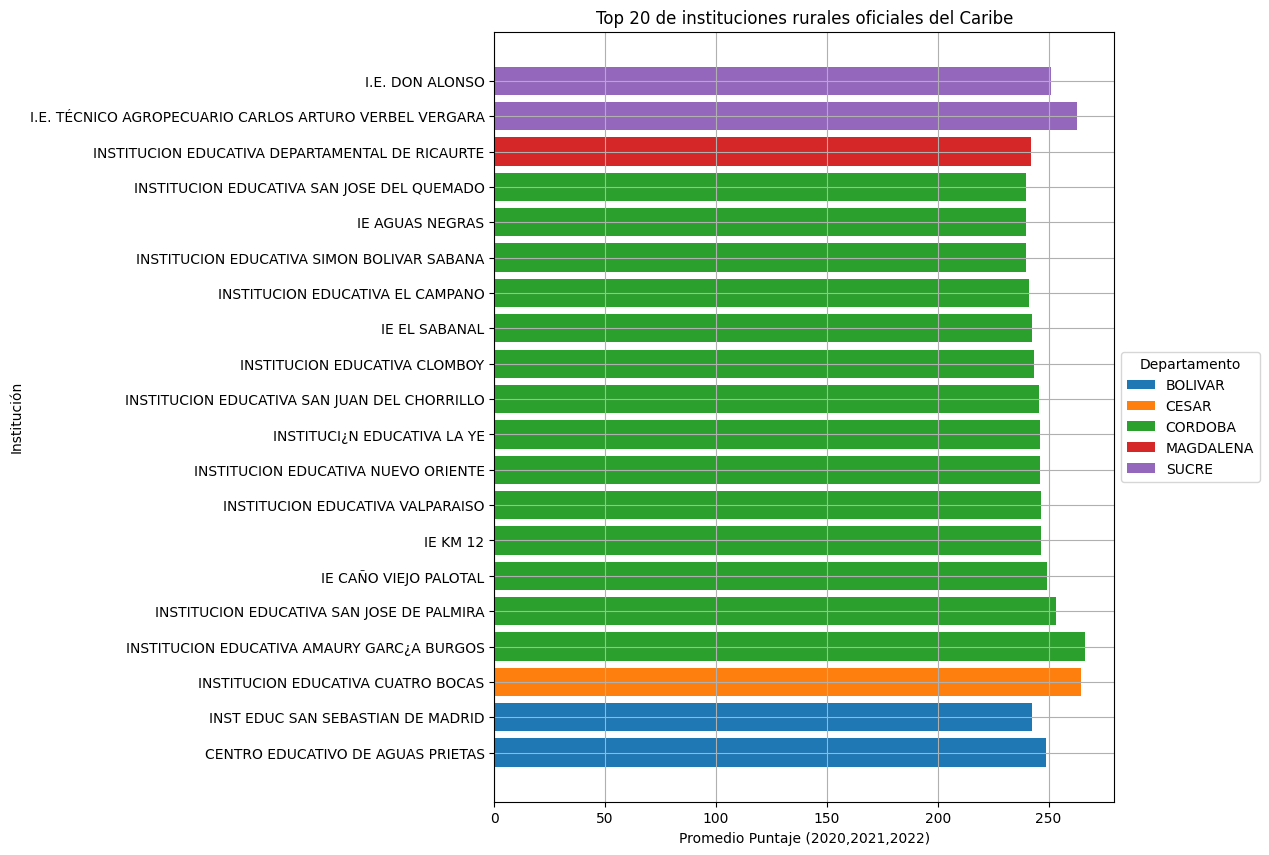

In [ ]:
# Filtrar las instituciones que pertenecen a la Zona RURAL y al Sector OFICIAL
df_filtrado = dfdefinitivo[(dfdefinitivo['Zona'] == 'RURAL') & (dfdefinitivo['Sector'] == 'OFICIAL')]

# Agrupar los datos por institución y departamento, y calcular el promedio del puntaje global para cada uno sobre los tres años
df_promedio_institucion = df_filtrado.groupby(['Establecimientos Educativos', 'Departamento'])[['Promedio del puntaje global 2020', 'Promedio del puntaje global 2021', 'Promedio del puntaje global 2022']].mean()

# Eliminar las instituciones que tienen algún valor faltante
#df_promedio_institucion = df_promedio_institucion.dropna()

# Calcular el promedio de los tres años y ordenar por ese promedio
df_promedio_institucion['Promedio_total'] = df_promedio_institucion.mean(axis=1)
df_promedio_institucion_top20 = df_promedio_institucion.sort_values(by='Promedio_total', ascending=False).head(20)

# Resetear el índice para tener acceso a las columnas Departamento e Institución
df_promedio_institucion_top20 = df_promedio_institucion_top20.reset_index()

# Trazar la gráfica de barras para las instituciones del top 20
plt.figure(figsize=(8, 10))
for departamento, data in df_promedio_institucion_top20.groupby('Departamento'):
    plt.barh(data['Establecimientos Educativos'], data['Promedio_total'], label=departamento)

plt.title('Top 20 de instituciones rurales oficiales del Caribe')
plt.xlabel('Promedio Puntaje (2020,2021,2022)')
plt.ylabel('Institución')
plt.legend(title='Departamento', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [ ]:
df_promedio_institucion['Promedio_total'] = df_promedio_institucion.mean(axis=1)
print(df_promedio_institucion.describe())


print(dfdefinitivo.describe())
dfdefinitivo.mean()


       Promedio del puntaje global 2020  Promedio del puntaje global 2021  \
count                        485.000000                        485.000000   
mean                         212.352921                        209.846701   
std                           18.432779                         16.974698   
min                          118.000000                        162.000000   
25%                          200.000000                        199.000000   
50%                          211.000000                        209.600000   
75%                          224.000000                        220.000000   
max                          293.000000                        285.000000   

       Promedio del puntaje global 2022  Promedio_total  
count                        485.000000      485.000000  
mean                         212.958419      211.719347  
std                           17.928723       15.909923  
min                          157.000000      161.000000  
25%             

<ipython-input-10-dc19f75320a6>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfdefinitivo.mean()


Promedio del puntaje global 2020    229.784218
Promedio del puntaje global 2021    227.866620
Promedio del puntaje global 2022    233.564944
dtype: float64

In [ ]:
# Obtener los conjuntos de valores únicos en las columnas 'Zona', 'Zona_x' y 'Zona_y'
zonas = set(dfdefinitivo['Zona'].unique())
zonas_x = set(dfdefinitivo['Zona_x'].unique())
zonas_y = set(dfdefinitivo['Zona_y'].unique())

# Comprobar si los valores en 'Zona' son los mismos que en 'Zona_x' y 'Zona_y'
if zonas == zonas_x == zonas_y:
    print("Los valores en 'Zona', 'Zona_x' y 'Zona_y' son los mismos.")
else:
    print("Los valores en 'Zona', 'Zona_x' y 'Zona_y' no son los mismos.")


Los valores en 'Zona', 'Zona_x' y 'Zona_y' son los mismos.


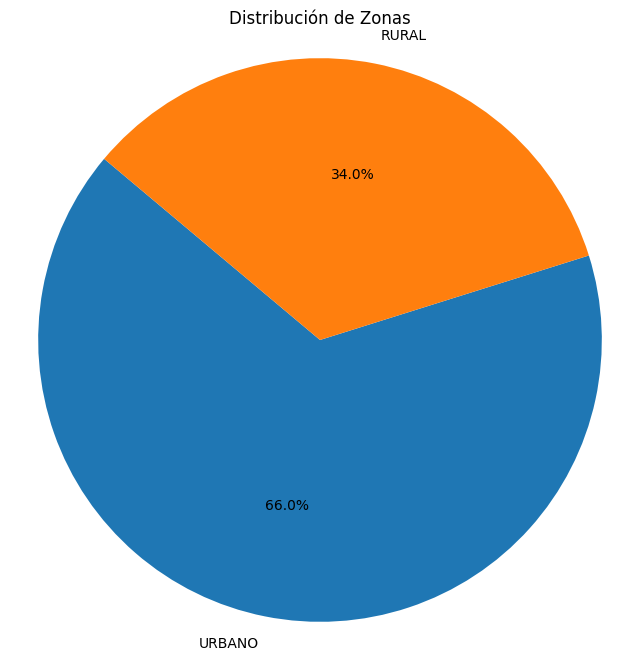

In [ ]:
# Contar la frecuencia de cada valor en la columna 'Zona'
zona_counts = dfdefinitivo['Zona'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(zona_counts, labels=zona_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Zonas')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

In [ ]:
# Obtener los conjuntos de valores únicos en las columnas 'Sector', 'Sector_x' y 'Sector_y'
zonas = set(dfdefinitivo['Sector'].unique())
zonas_x = set(dfdefinitivo['Sector_x'].unique())
zonas_y = set(dfdefinitivo['Sector_y'].unique())

# Comprobar si los valores en 'Zona' son los mismos que en 'Zona_x' y 'Zona_y'
if zonas == zonas_x == zonas_y:
    print("Los valores en 'Sector', 'Sector_x' y 'Sector_y' son los mismos.")
else:
    print("Los valores en 'Sector', 'Sector_x' y 'Sector_y' no son los mismos.")

Los valores en 'Sector', 'Sector_x' y 'Sector_y' son los mismos.


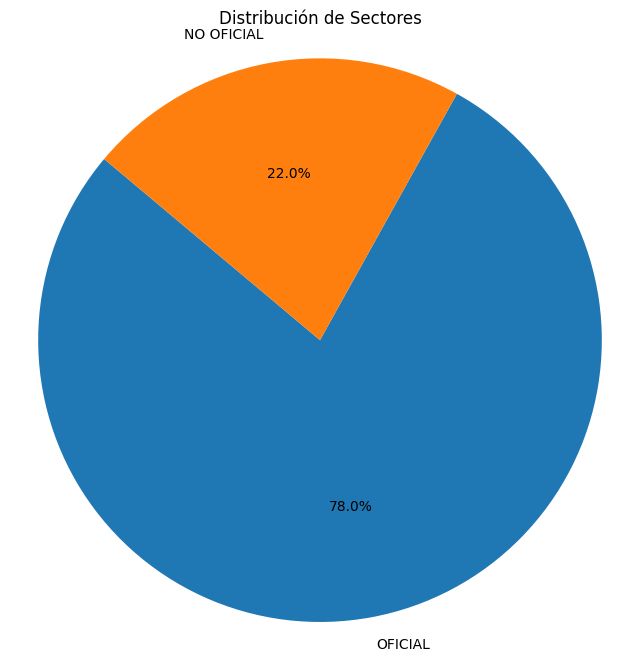

In [ ]:
# Contar la frecuencia de cada valor en la columna 'Sector'
sector_counts = dfdefinitivo['Sector'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Sectores')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

In [ ]:
df_promedio_institucion_top20

,Establecimientos Educativos,Departamento,Promedio del puntaje global 2020,Promedio del puntaje global 2021,Promedio del puntaje global 2022,Promedio_total
0,INSTITUCION EDUCATIVA AMAURY GARC¿A BURGOS,CORDOBA,283.0,246.0,270.0,266.333333
1,INSTITUCION EDUCATIVA CUATRO BOCAS,CESAR,293.0,259.0,242.0,264.666667
2,I.E. TÉCNICO AGROPECUARIO CARLOS ARTURO VERBEL...,SUCRE,267.0,264.0,257.0,262.666667
3,INSTITUCION EDUCATIVA SAN JOSE DE PALMIRA,CORDOBA,250.0,254.0,256.0,253.333333
4,I.E. DON ALONSO,SUCRE,244.0,257.0,252.0,251.000000
5,IE CAÑO VIEJO PALOTAL,CORDOBA,260.0,240.0,248.0,249.333333
6,CENTRO EDUCATIVO DE AGUAS PRIETAS,BOLIVAR,230.0,285.0,232.0,249.000000
7,IE KM 12,CORDOBA,242.0,224.0,274.0,246.666667
8,INSTITUCION EDUCATIVA VALPARAISO,CORDOBA,254.0,234.0,252.0,246.666667
9,INSTITUCION EDUCATIVA NUEVO ORIENTE,CORDOBA,233.0,243.0,263.0,246.333333


In [ ]:
df_promedio_institucion_top20G

,Establecimientos Educativos,Departamento,Promedio del puntaje global 2020,Promedio del puntaje global 2021,Promedio del puntaje global 2022,Promedio_total
0,CENTRO EDUCATIVO BOSTON INTERNACIONAL,ATLANTICO,363.0,374.0,382.0,373.000000
1,NUEVO COLEGIO DEL PRADO,ATLANTICO,361.0,361.0,361.0,361.000000
2,CORPORACION EDUCATIVA LA CONCEPCION,BOLIVAR,354.0,356.0,364.0,358.000000
3,INSTITUCION EDUCATIVA DISTRITAL ALEXANDER VON ...,ATLANTICO,359.0,355.0,359.0,357.666667
4,CENTRO DE EDUCACION EL RECREO,BOLIVAR,358.0,350.0,356.0,354.666667
5,FUNDACION EDUCATIVA INSTITUTO EXPERIMENTAL DEL...,ATLANTICO,348.0,356.0,355.0,353.000000
6,CORPORACION EDUCATIVA LA SAGRADA FAMILIA,BOLIVAR,338.0,349.0,345.0,344.000000
7,COLEGIO INTERNACIONAL CARTAGENA (COL INTER S...,BOLIVAR,348.0,350.0,334.0,344.000000
8,INSTITUTO EDUCATIVO MARÍA MONTESSORI,LA GUAJIRA,331.0,346.0,347.0,341.333333
9,NUEVO COLEGIO MARIA MONTESSORI,ATLANTICO,335.0,350.0,338.0,341.000000


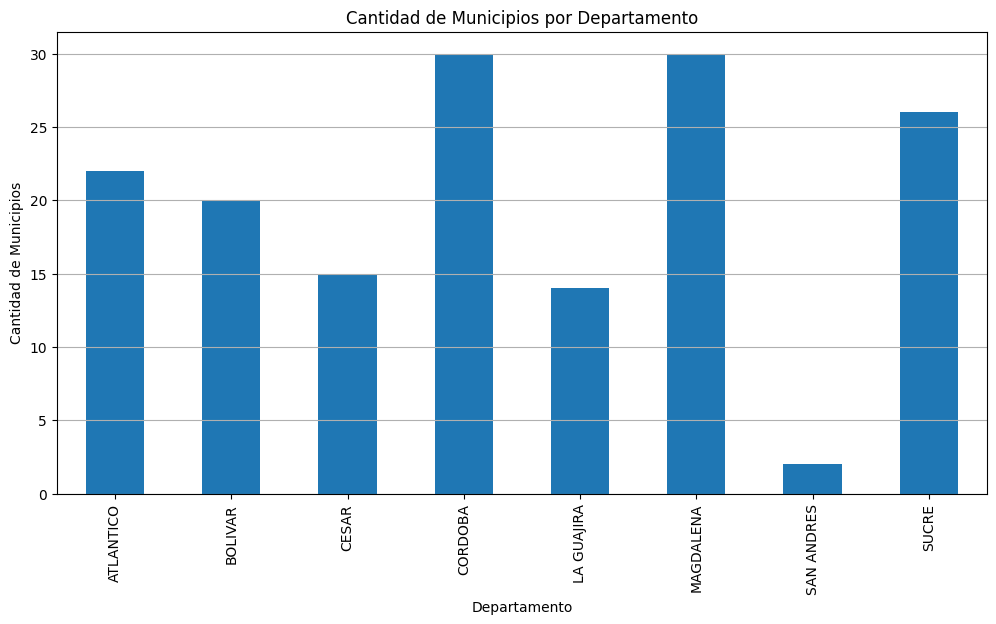

In [ ]:
# Agrupar por departamento y contar municipios
conteo_municipios_por_departamento = dfdefinitivo.groupby('Departamento')['Municipio'].nunique()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
conteo_municipios_por_departamento.plot(kind='bar')
plt.title('Cantidad de Municipios por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Municipios')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### Conclusiones Categoricas



*   En el top 20 de instituciones del caribe, se puede ver como Bolivar destaca con una participación del 45% en el top de mejores instituciones. A su vez, le sigue Atlantico con un 35%.
Lo mencionado anteriormente podria parecer común, pues es bien sabido que Bolivar es el departamento más grande en extensión del Caribe y Atlantico el más rico economicamente hablando. Sin embargo, sorprende la presencia de 2 instuciones de La Guajira, pues logran abrirse paso entre las instituciones con mejor puntaje a pesar de no ser un departamento muy prospero.

*   Respecto a un top 20 centrado unicamente en las instituciones rurales oficiales del Caribe, podemos ver como se redistribuye la participación. En este caso domina fuertemente Córdoba, con una participación del 70% en el top.Seguido de Bolivar y Sucre, ambos con una participación del 10%. Esto es algo interesante, pues el departamento más grande en extensión es Bolivar. Pero no es el que cuenta con mayor participación en este top, si no que es Córdoba el segundo lugar en extensión territorial es el que destaca.
Por otro lado Sucre, es el tercer lugar en extensión territorial y esta al nivel de Bolivar en participación.



*   Se puede observar una gran brecha entre los resultados de ambos tops, pues el top de todo el caribe cuenta con instituciones que sobrepasan facilmente los 300 puntos. Mientras que todas las del top rural oficial sobrepasan dificilmente la barrera de los 250 puntos.





*  El 66% de las instituciones evaluadas pertenecen a la región Urbana del Caribe, mientras que el 34& a la zona rural.



*   Por otro lado, el 78% son Instituciones Oficiales, mientras que el 22% restante son No Oficiales


*   Al ver la cantidad de municipios evaluados por departamento, se puede ver que Bolviar a pesar de ser el más extenso no es el que mas municipios cuenta. Esto se puede deber a que no muchas partes del departamento se encuentran habitadas o con instituciones educativas. Por otro lado, Córdoba y Magdalena encabezan el gráfico, seguido de Sucre








## 6. Analisis Variables Numericas

In [ ]:
# Agrupar los datos por departamento y calcular el promedio del puntaje global para cada año
df_promedio_departamento = dfdefinitivo.groupby(['Departamento']).mean()

print(df_promedio_departamento.columns)


Index(['Promedio del puntaje global 2020', 'Promedio del puntaje global 2021',
       'Promedio del puntaje global 2022'],
      dtype='object')


<ipython-input-18-c75e2b185dba>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_promedio_departamento = dfdefinitivo.groupby(['Departamento']).mean()


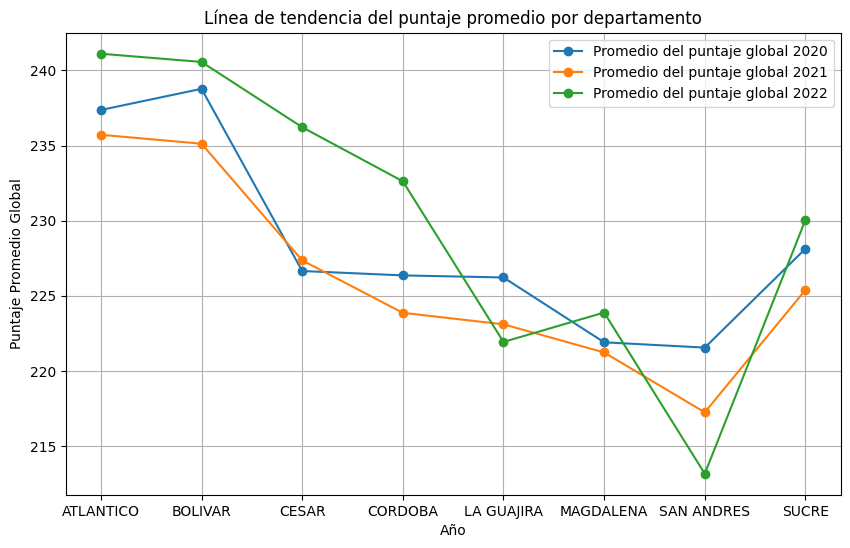

In [ ]:
# Trazar la línea de tendencia central
df_promedio_departamento.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Línea de tendencia del puntaje promedio por departamento')
plt.xlabel('Año')
plt.ylabel('Puntaje Promedio Global')
plt.grid(True)
plt.legend(loc='best')
plt.show()

<ipython-input-20-0cd2c9794de0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_promedio_departamento = df_rural.groupby(['Departamento']).mean()


Index(['Promedio del puntaje global 2020', 'Promedio del puntaje global 2021',
       'Promedio del puntaje global 2022'],
      dtype='object')


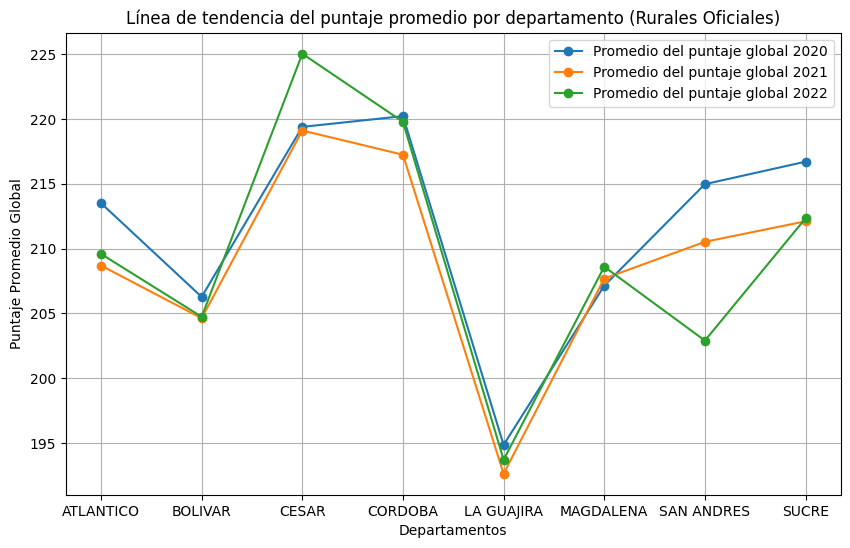

In [ ]:

# Filtrar las instituciones que pertenecen a la Zona RURAL
df_rural  = dfdefinitivo[(dfdefinitivo['Zona'] == 'RURAL') & (dfdefinitivo['Sector'] == 'OFICIAL')]

# Agrupar los datos por departamento y calcular el promedio del puntaje global para cada año
df_promedio_departamento = df_rural.groupby(['Departamento']).mean()

# Imprimir las columnas disponibles si lo deseas
print(df_promedio_departamento.columns)

# Trazar la línea de tendencia central
df_promedio_departamento.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Línea de tendencia del puntaje promedio por departamento (Rurales Oficiales)')
plt.xlabel('Departamentos')
plt.ylabel('Puntaje Promedio Global')
plt.grid(True)
plt.legend(loc='best')
plt.show()

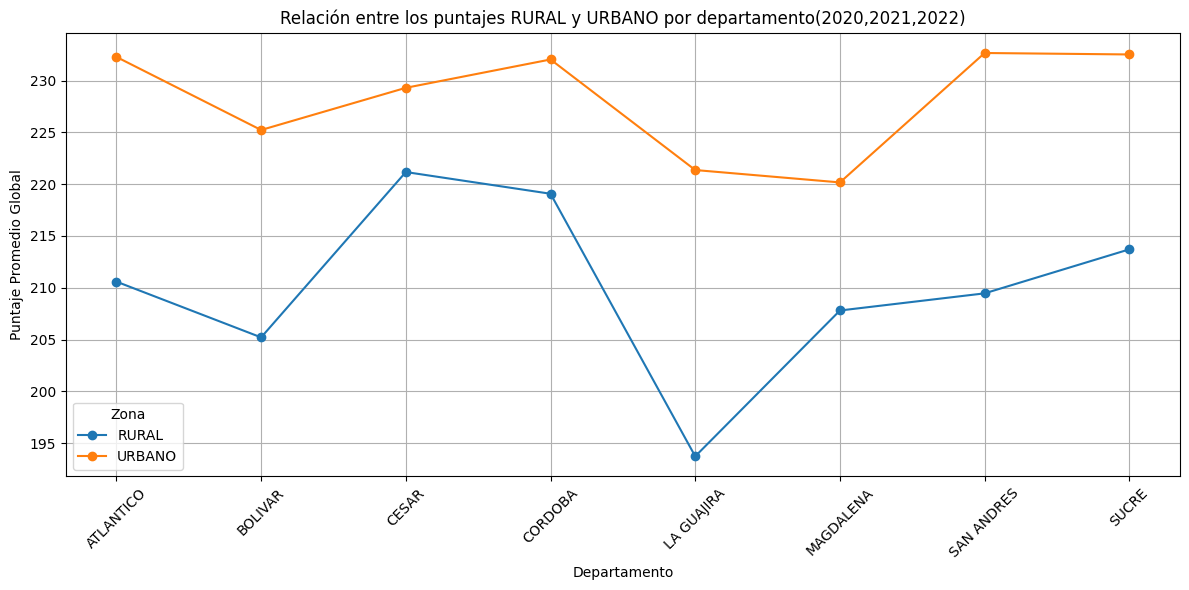

In [ ]:


# Filtrar las instituciones que pertenecen a la Zona URBANA y al Sector OFICIAL
df_urbano = dfdefinitivo[(dfdefinitivo['Zona'] == 'URBANO') & (dfdefinitivo['Sector'] == 'OFICIAL')]

# Calcular el promedio del puntaje global por departamento para las zonas RURAL y URBANA
df_promedio_departamento_rural = df_rural.groupby('Departamento')[['Promedio del puntaje global 2020', 'Promedio del puntaje global 2021', 'Promedio del puntaje global 2022']].mean()
df_promedio_departamento_urbano = df_urbano.groupby('Departamento')[['Promedio del puntaje global 2020', 'Promedio del puntaje global 2021', 'Promedio del puntaje global 2022']].mean()

# Trazar la relación entre los puntajes RURAL y URBANO por departamento
plt.figure(figsize=(12, 6))
plt.plot(df_promedio_departamento_rural.index, df_promedio_departamento_rural.mean(axis=1), marker='o', label='RURAL')
plt.plot(df_promedio_departamento_urbano.index, df_promedio_departamento_urbano.mean(axis=1), marker='o', label='URBANO')
plt.title('Relación entre los puntajes RURAL y URBANO por departamento(2020,2021,2022)')
plt.xlabel('Departamento')
plt.ylabel('Puntaje Promedio Global')
plt.grid(True)
plt.legend(title='Zona', loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

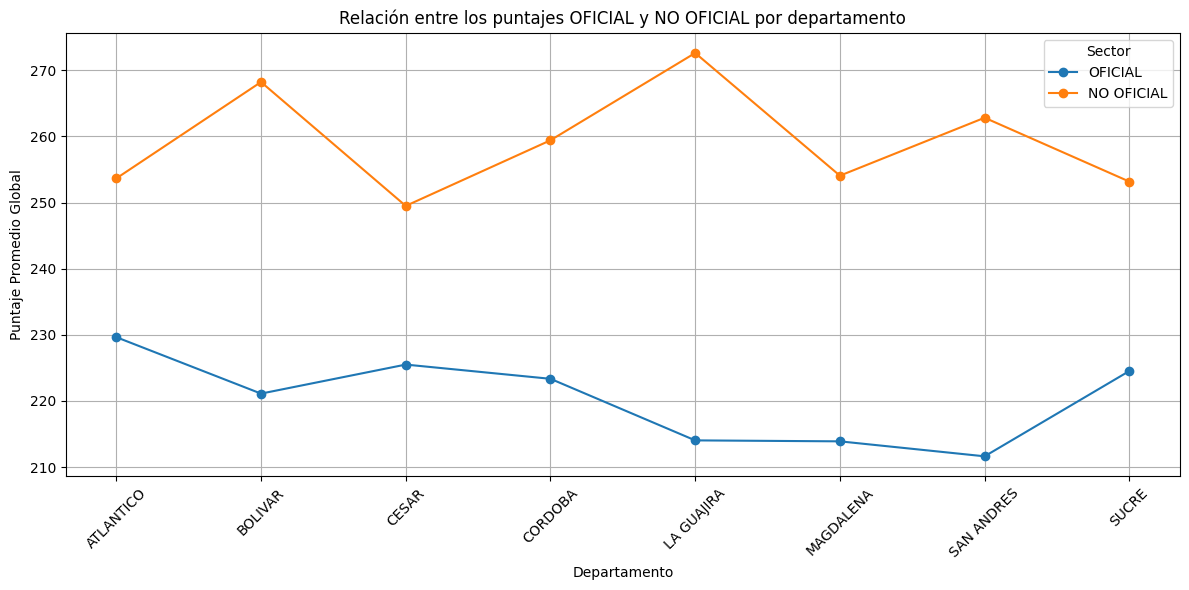

In [ ]:
# Filtrar las instituciones que pertenecen a los sectores OFICIAL y NO OFICIAL
df_oficial = dfdefinitivo[dfdefinitivo['Sector'] == 'OFICIAL']
df_no_oficial = dfdefinitivo[dfdefinitivo['Sector'] == 'NO OFICIAL']

# Calcular el promedio del puntaje global por departamento para los sectores OFICIAL y NO OFICIAL
df_promedio_departamento_oficial = df_oficial.groupby('Departamento')[['Promedio del puntaje global 2020', 'Promedio del puntaje global 2021', 'Promedio del puntaje global 2022']].mean()
df_promedio_departamento_no_oficial = df_no_oficial.groupby('Departamento')[['Promedio del puntaje global 2020', 'Promedio del puntaje global 2021', 'Promedio del puntaje global 2022']].mean()

# Trazar la relación entre los puntajes OFICIAL y NO OFICIAL por departamento
plt.figure(figsize=(12, 6))
plt.plot(df_promedio_departamento_oficial.index, df_promedio_departamento_oficial.mean(axis=1), marker='o', label='OFICIAL')
plt.plot(df_promedio_departamento_no_oficial.index, df_promedio_departamento_no_oficial.mean(axis=1), marker='o', label='NO OFICIAL')
plt.title('Relación entre los puntajes OFICIAL y NO OFICIAL por departamento')
plt.xlabel('Departamento')
plt.ylabel('Puntaje Promedio Global')
plt.grid(True)
plt.legend(title='Sector', loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusion Numericas



*   Respecto a la linea de tendencia del puntaje promedio por departamento, se puede observar como el año más estable fue el 2020, de igual manera el 2021 fue un año en donde por lo general todas las instituciones empeoraron sus resultados a exepción del Cesar. Sin embargo, el 2022 fue un año de una notable mejora para la mayoria de las instituciones, a exepción de La Guajira que sus resultados solo fueron empeorando y de San Andres, que cuenta con el mismo patrón, siendo el departamento que más ha empeorado, mientras que Cesar el que más ha mejorado.

*   Respecto a la linea de tendencia del puntaje promedio de las instituciones Rurales Oficiales, se puede ver que su comportamiento a través de los años no cambia demasiado, a exepción de Cesar que muestra nuevamente una clara mejora y de San Andrés que presenta un notable decrecimiento en el desempeño.

*   La relación entre los puntajes Rurales y Urbanos muestra como las instituciones Urbanas cuentan con una notable ventaja en la mayoria de los departamentos, a exepción de Cesar y Córdoba, donde la brecha entre ambos es mucho más pequeña. Sin embargo, sigue sin ser suficiente para llegar al nivel de las instituciones urbanas.

*   La relación entre los puntajes de las instituciones Oficiales y No Oficiales muestra una notable ventaja de las instituciones privadas sobre las públicas, pues los peores resultados de la primera ni siquiera están cerca de los mejores de la ultima mencionada.






### Conclusiones estadisticas



*   El año 2020 cuenta con un promedio intermedio en los resultados en comparación a los otros 2 años. Sin embargo, cuenta con el resultado mínimo con un valor de 118 y con el máximo más bajo de 363. Cabe mencionar que a pesar de esto es impresionante que se mantenga en un nivel intermedio en temas de promedio global, pues este fue el año en el que empezó la pandemia y esto demuestra un buen manejo por parte del ICFES para adaptarse a este cambio

*   El año 2021 cuenta con el promedio más bajo en comparación a los otros 2 años evaluados. Sin embargo cuenta con el segúndo minimó mas alto de 147 y con el segundo máximo más alto con un valor de 374. Esto demuestra que en promedio hubo una desmejoría a lo largo que avanzaba la pandemia, puede deverse a perdida de interés en los estudiantes o complicaciones a la hora de tomar la prueba. Sin embargo, hubo una mejoria en el minimo y en el maximo, demostrando asi que algunas instituciones pudieron mejorar incluso en situaciones adversas.



*   El año 2022 cuenta con el promedio más alto en comparacióm a los otros 2 años evalaudos, de igual manera cuenta con el valor mínimo más alto con un 157 y con el máximo más alto de 382. Esto demuestra ya un proceso de adaptación a los cambiós y una demostración de como la vida estaba volviendo a la normalidad. Los estudiantes y las instituciones se adaptarón, mejoraron y dieron pasó a unos mejores resultados en terminos generales.






In [ ]:
# Obtener estadísticas descriptivas del DataFrame dfdefinitivo
estadisticas_descriptivas = dfdefinitivo.describe()

# Imprimir las estadísticas descriptivas
print(estadisticas_descriptivas)
print(df_promedio_institucion.describe())

       Promedio del puntaje global 2020  Promedio del puntaje global 2021  \
count                       2864.000000                       2864.000000   
mean                         229.784218                        227.866620   
std                           29.717488                         29.728184   
min                          118.000000                        147.000000   
25%                          212.000000                        207.000000   
50%                          222.000000                        221.000000   
75%                          240.000000                        240.000000   
max                          363.000000                        374.000000   

       Promedio del puntaje global 2022  
count                       2864.000000  
mean                         233.564944  
std                           30.927066  
min                          157.000000  
25%                          211.000000  
50%                          228.000000  
75%         

## 7. Postprocesado / Sklearn

SKLEARN


In [ ]:
# Import

# Pipeline
from sklearn.pipeline import Pipeline

# Scaler estandar preprocesado
from sklearn.preprocessing import StandardScaler

# Splitter
from sklearn.model_selection import train_test_split

# Importamos un clasificador: Support Vector Classifier para ML
from sklearn.svm import SVC

from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
# Obtener los nombres únicos de los municipios presentes en el DataFrame dfdefinitivo
municipios_presentes = dfdefinitivo['Municipio'].unique()
dptos_presentes = dfdefinitivo['Departamento'].unique()
instituciones_presentes = dfdefinitivo['Establecimientos Educativos'].unique()



# Imprimir los nombres de los municipios
print(municipios_presentes)
print(dptos_presentes)


['BARRANQUILLA' 'CARTAGENA DE INDIAS' 'TURBACO' 'RIOHACHA' 'SOLEDAD'
 'MAGANGUÉ' 'PUERTO COLOMBIA' 'SANTA MARTA' 'ARJONA' 'MONTERÍA'
 'VALLEDUPAR' 'MONTELÍBANO' 'MALAMBO' 'SINCELEJO' 'SAHAGÚN' 'LORICA'
 'MAICAO' 'PLANETA RICA' 'AGUACHICA' 'CERETÉ' 'SAN ANDRÉS' 'COROZAL'
 'MOMPÓS' 'CHINÚ' 'CIÉNAGA' 'EL BANCO' 'SAN MARCOS' 'EL CARMEN DE BOLÍVAR'
 'SANTIAGO DE TOLÚ' 'SAN MARTÍN' 'PUERTO ESCONDIDO' 'FUNDACIÓN'
 'SAN PELAYO' 'GALAPA' 'VILLANUEVA' 'SAN ANDRÉS DE SOTAVENTO' 'FONSECA'
 'SAN JUAN DEL CESAR' 'PLATO' 'AGUSTÍN CODAZZI' 'BARRANCAS' 'SABANALARGA'
 'VALENCIA' 'EL ROBLE' 'SAN PEDRO' 'LOS CÓRDOBAS' 'TOLÚ VIEJO'
 'SANTA ROSA DEL SUR' 'COVEÑAS' 'AYAPEL' 'SAMPUÉS' 'BARANOA'
 'SAN LUIS DE SINCÉ' 'SAN BERNARDO DEL VIENTO' 'TIERRALTA' 'LOS PALMITOS'
 'PUEBLO NUEVO' 'PUERTO LIBERTADOR' 'BUENAVISTA' 'SANTO TOMÁS'
 'SANTA ROSA' 'CHIMICHAGUA' 'PIVIJAY' 'SAN JUAN DE BETULIA' 'CANALETE'
 'SAN ANTERO' 'LA APARTADA' 'CHIMÁ' 'URUMITA' 'GUAMAL' 'EL COPEY' 'COLOSÓ'
 'TAMALAMEQUE' 'SAN SEBASTIÁN DE BUEN

In [ ]:
print(instituciones_presentes)

['CENTRO EDUCATIVO BOSTON INTERNACIONAL' 'NUEVO COLEGIO DEL PRADO'
 'INSTITUCION EDUCATIVA DISTRITAL ALEXANDER VON HUMBOLDT' ...
 'COLEGIO INSTITUTO TECNICO DEL CARIBE'
 'INSTITUCION  ETNOEDUCATIVO RURAL DE  MARACARI'
 'INSTITUCION EDUCATIVA MATA DE PLATANO']


In [ ]:
dfdefinitivo.head()

,DANE Establecimiento_x,Departamento_x,Municipio_x,Establecimientos Educativos,Promedio del puntaje global 2020,Zona_x,Sector_x,DANE Establecimiento_y,Departamento_y,Municipio_y,Promedio del puntaje global 2021,Zona_y,Sector_y,DANE Establecimiento,Departamento,Municipio,Promedio del puntaje global 2022,Zona,Sector
0,"3,080011E+11",ATLANTICO,BARRANQUILLA,CENTRO EDUCATIVO BOSTON INTERNACIONAL,363,URBANO,NO OFICIAL,"3,08001E+11",ATLANTICO,BARRANQUILLA,374,URBANO,NO OFICIAL,"3,08001E+11",ATLANTICO,BARRANQUILLA,382,URBANO,NO OFICIAL
1,"3,080010E+11",ATLANTICO,BARRANQUILLA,NUEVO COLEGIO DEL PRADO,361,URBANO,NO OFICIAL,"3,08001E+11",ATLANTICO,BARRANQUILLA,361,URBANO,NO OFICIAL,"3,08001E+11",ATLANTICO,BARRANQUILLA,361,URBANO,NO OFICIAL
2,"1,080010E+11",ATLANTICO,BARRANQUILLA,INSTITUCION EDUCATIVA DISTRITAL ALEXANDER VON ...,359,URBANO,OFICIAL,"1,08001E+11",ATLANTICO,BARRANQUILLA,355,URBANO,OFICIAL,"1,08001E+11",ATLANTICO,BARRANQUILLA,359,URBANO,OFICIAL
3,"3,130010E+11",BOLIVAR,CARTAGENA DE INDIAS,CENTRO DE EDUCACION EL RECREO,358,URBANO,NO OFICIAL,"3,13001E+11",BOLIVAR,CARTAGENA DE INDIAS,350,URBANO,NO OFICIAL,"3,13001E+11",BOLIVAR,CARTAGENA DE INDIAS,356,URBANO,NO OFICIAL
4,"3,138360E+11",BOLIVAR,TURBACO,CORPORACION EDUCATIVA LA CONCEPCION,354,URBANO,NO OFICIAL,"3,13836E+11",BOLIVAR,TURBACO,356,URBANO,NO OFICIAL,"3,13836E+11",BOLIVAR,TURBACO,364,URBANO,NO OFICIAL


In [ ]:
columnas_deseadas = ['Establecimientos Educativos', 'Municipio', 'Departamento',"Sector","Zona","Promedio del puntaje global 2020","Promedio del puntaje global 2021","Promedio del puntaje global 2022"]
df_procesado = dfdefinitivo.loc[:, columnas_deseadas].copy()
df_procesado.head()

,Establecimientos Educativos,Municipio,Departamento,Sector,Zona,Promedio del puntaje global 2020,Promedio del puntaje global 2021,Promedio del puntaje global 2022
0,CENTRO EDUCATIVO BOSTON INTERNACIONAL,BARRANQUILLA,ATLANTICO,NO OFICIAL,URBANO,363,374,382
1,NUEVO COLEGIO DEL PRADO,BARRANQUILLA,ATLANTICO,NO OFICIAL,URBANO,361,361,361
2,INSTITUCION EDUCATIVA DISTRITAL ALEXANDER VON ...,BARRANQUILLA,ATLANTICO,OFICIAL,URBANO,359,355,359
3,CENTRO DE EDUCACION EL RECREO,CARTAGENA DE INDIAS,BOLIVAR,NO OFICIAL,URBANO,358,350,356
4,CORPORACION EDUCATIVA LA CONCEPCION,TURBACO,BOLIVAR,NO OFICIAL,URBANO,354,356,364


In [ ]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit_transform(df_procesado[['Establecimientos Educativos']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ohe.categories_

[array(['ACADEMIA GUSTAVO ROJAS PINILLAS', 'ATENEO MODERNO',
        'ATENEO TECNICO COMERCIAL', ..., 'TECNICO DEPARTAMENTAL NATANIA',
        'UNIDAD PEDAGÓGICA BOLIVARIANA', 'WINDSOR ROYAL SCHOL'],
       dtype=object)]

In [ ]:
X= df_procesado.drop(['Promedio del puntaje global 2020','Promedio del puntaje global 2021','Promedio del puntaje global 2022'], axis='columns')

In [ ]:
Y = df_procesado.drop(['Establecimientos Educativos','Municipio','Departamento','Sector','Zona'], axis='columns')

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Establecimientos Educativos', 'Municipio',"Departamento","Sector","Zona"]),
    remainder='passthrough')

In [ ]:
column_trans.fit_transform(X)

<2864x1754 sparse matrix of type '<class 'numpy.float64'>'
	with 14320 stored elements in Compressed Sparse Row format>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

pipe = make_pipeline(column_trans,linreg)


In [ ]:
X

,Establecimientos Educativos,Municipio,Departamento,Sector,Zona
0,CENTRO EDUCATIVO BOSTON INTERNACIONAL,BARRANQUILLA,ATLANTICO,NO OFICIAL,URBANO
1,NUEVO COLEGIO DEL PRADO,BARRANQUILLA,ATLANTICO,NO OFICIAL,URBANO
2,INSTITUCION EDUCATIVA DISTRITAL ALEXANDER VON ...,BARRANQUILLA,ATLANTICO,OFICIAL,URBANO
3,CENTRO DE EDUCACION EL RECREO,CARTAGENA DE INDIAS,BOLIVAR,NO OFICIAL,URBANO
4,CORPORACION EDUCATIVA LA CONCEPCION,TURBACO,BOLIVAR,NO OFICIAL,URBANO
...,...,...,...,...,...
2859,CENTRO EDUCATIVO LICEO MI NUEVA ESPERANZA,ARJONA,BOLIVAR,NO OFICIAL,URBANO
2860,INSTITUCION ETNOEDUCATIVA DEPARTAMENTAL ETTE E...,SABANAS DE SAN ÁNGEL,MAGDALENA,OFICIAL,RURAL
2861,COLEGIO INSTITUTO TECNICO DEL CARIBE,SANTA MARTA,MAGDALENA,NO OFICIAL,URBANO
2862,INSTITUCION ETNOEDUCATIVO RURAL DE MARACARI,MANAURE,LA GUAJIRA,OFICIAL,RURAL


In [ ]:
pipe.fit(X,Y)
pipe.score(X,Y)


0.9197056656218298